# Computer Vision Bootcamp: Assignment 2

## Reading

*Take* a photo of any object in your room using your mobile or laptop's camera

Upload the image into Colab. Then read the image

In [91]:
# Import the needed libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


### General Purpose Operations

In [92]:
def show_image(img, title=None):
    if title is None:
        title = "Gray View"
    plt.title(title)
    # Check if the image is grayscale
    if not (len(img.shape) < 3):
        rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(rgb)
        plt.show()
    else:
        plt.imshow(img, cmap="gray")
        plt.show()

def show_images_figure(images, titles):
    if len(images) == len(titles):
        imgs_num = len(images)
        plt.figure(figsize=(imgs_num * 5, 5))

        for i in range(imgs_num):
            plt.subplot(1, imgs_num, i+1)
            plt.title(titles[i])
            plt.imshow(images[i], cmap="gray")
            plt.axis('off')
        plt.show()
    else:
        raise ValueError("Kindly checkout your arguments, they're not with the same length.")

def plot_one_histogram(images, colors=None, labels=None, title=None):
    plt.figure(figsize=(8, 4))

    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    if labels is None:
        labels = [f'Channel {i+1}' for i in range(len(images))]

    for i, image in enumerate(images):
        if i < len(colors):
            color = colors[i]
        else:
            color = colors[-1]  # Use the last color for additional images

        hist = cv.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color=color, label=labels[i])

    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    if title is None:
        title = 'Histograms of Images'
    plt.title(title)

    plt.grid(True)
    plt.show()

def plot_multiple_histograms(images, colors=None, labels=None):
    hist_num = len(images)
    plt.figure(figsize=(hist_num * 5, 5))

    for i in range(hist_num):
        image = images[i]

        if colors is not None:
            color = colors[i] if i < len(colors) else None
        else:
            color = None

        if labels is not None:
            label = labels[i] if i < len(labels) else None
        else:
            label = None

        # Calculate the histogram for the current image
        hist = cv.calcHist([image], [0], None, [256], [0, 256])

        plt.subplot(1, hist_num, i+1)
        plt.plot(hist, color=color, label=label)

        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.title(f'Histogram {i+1}' if label is None else label)

        plt.grid(True)

    plt.tight_layout()
    plt.show()


### Reading First Image (Tomato)

In [93]:
# read the 1st image

tomato = cv.imread("extract.jpg")

### Reading Second Image (Chroma)

In [94]:
# read the 2nd image

chroma = cv.imread("segment.jpg")

Resize the image to 512*512 pixels using the resize function in OpenCV

In [95]:
# Resize the images

resized_tomato_img = cv.resize(tomato, (512, 512))
resized_chroma_img = cv.resize(chroma, (512, 512))

## Converting

...::: Tomato RGB & Gray :::...


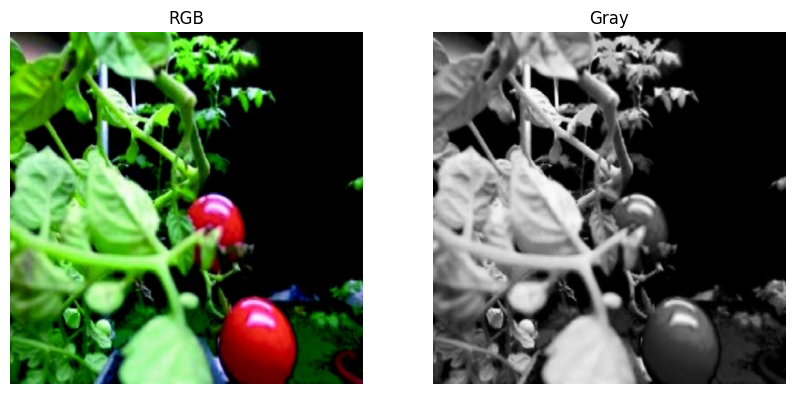

...::: Chroma RGB & Gray :::...


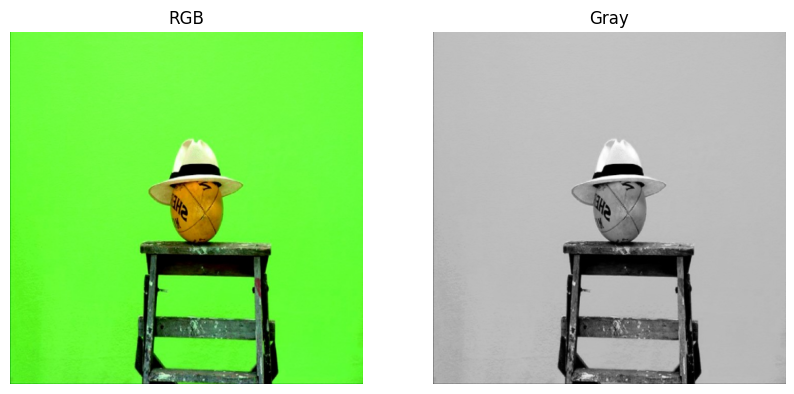

In [96]:
# Convert the reseized image to RGB
rgb_tomato = cv.cvtColor(resized_tomato_img, cv.COLOR_BGR2RGB)
rgb_chroma = cv.cvtColor(resized_chroma_img, cv.COLOR_BGR2RGB)

# Convert the reseized image to grayscale
gray_tomato = cv.cvtColor(resized_tomato_img, cv.COLOR_BGR2GRAY)
gray_chroma = cv.cvtColor(resized_chroma_img, cv.COLOR_BGR2GRAY)

# show the rgb and Gray images

img_titles = ["RGB", "Gray"]

print("...::: Tomato RGB & Gray :::...")
show_images_figure([rgb_tomato, gray_tomato], img_titles)

print("...::: Chroma RGB & Gray :::...")
show_images_figure([rgb_chroma, gray_chroma], img_titles)

## Edge Detection

### Laplacian of Gaussian

...::: Tomato Figure :::...


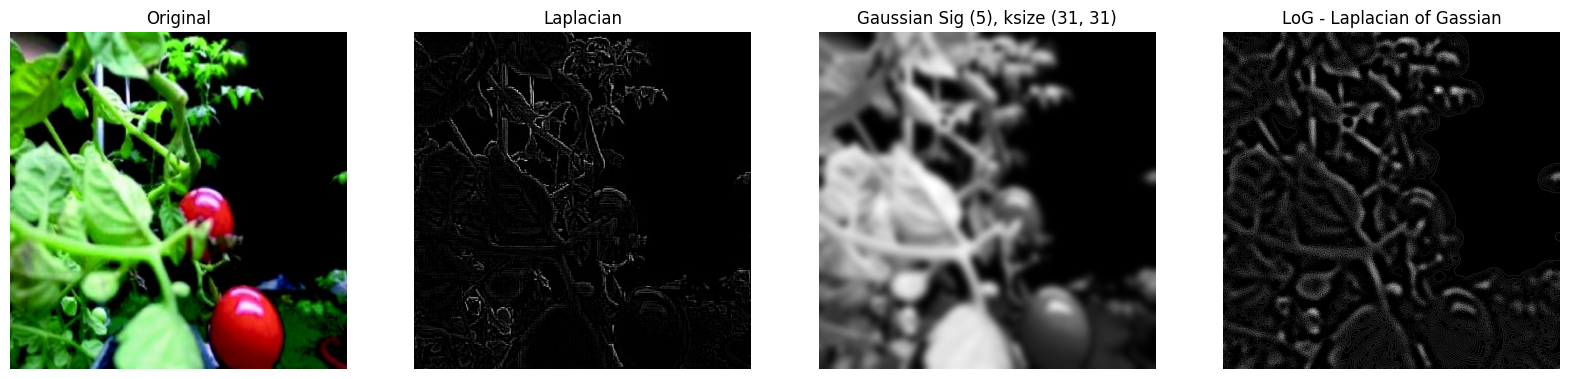

...::: Chroma Figure :::...


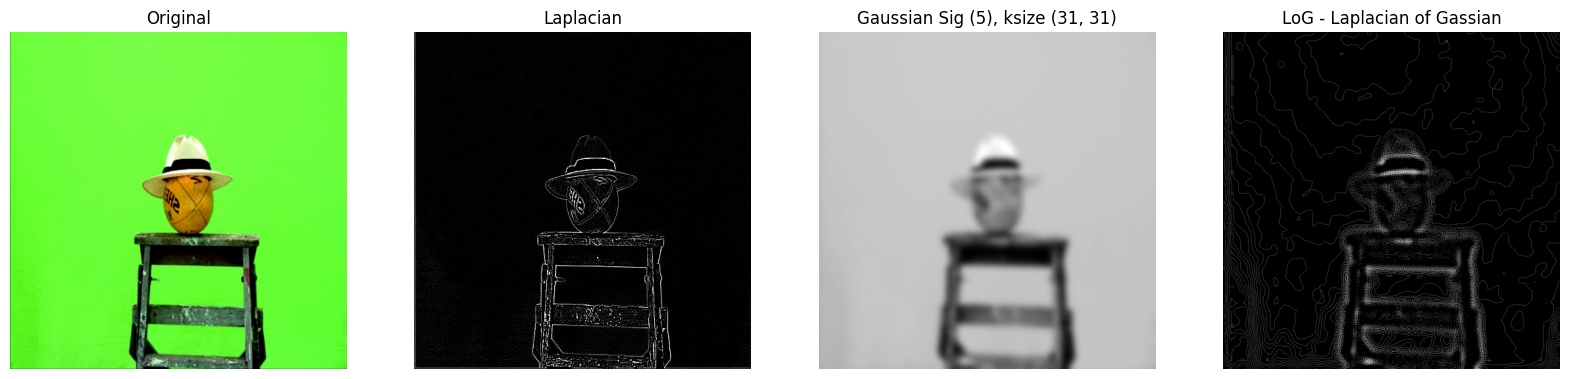

In [97]:
# Convolve the gray resized image with a Laplacian
laplacian_filter = np.array([ [-1, -1, -1],
                              [-1, 8, -1],
                              [-1, -1, -1]])

laplacian_edges_tomato = cv.filter2D(gray_tomato, -1, laplacian_filter)
laplacian_edges_chroma = cv.filter2D(gray_chroma, -1, laplacian_filter)

# Convolve the gray resized image with a Gaussian of sigma 5
gaussian_sigma = 5
gaussian_kernel_size = (31, 31)

gaussian_sig5_tomato = cv.GaussianBlur(gray_tomato, gaussian_kernel_size , gaussian_sigma)
gaussian_sig5_chroma = cv.GaussianBlur(gray_chroma, gaussian_kernel_size , gaussian_sigma)

# Find the Laplacian of Gaussian
log_tomato = cv.filter2D(gaussian_sig5_tomato, -1, laplacian_filter)
log_chroma = cv.filter2D(gaussian_sig5_chroma, -1, laplacian_filter)

# Show the original image, the laplacian, the gaussian, and the Laplacian of Gaussian results in one figure
print("...::: Tomato Figure :::...")

tomato_images = [rgb_tomato, laplacian_edges_tomato, gaussian_sig5_tomato, log_tomato]
tomato_titles = ["Original", "Laplacian", f"Gaussian Sig ({gaussian_sigma}), ksize {gaussian_kernel_size}", "LoG - Laplacian of Gassian"]
show_images_figure(tomato_images, tomato_titles)

print("...::: Chroma Figure :::...")

chroma_images = [rgb_chroma, laplacian_edges_chroma, gaussian_sig5_chroma, log_chroma]
chroma_titles = ["Original", "Laplacian", f"Gaussian Sig ({gaussian_sigma}), ksize {gaussian_kernel_size}", "LoG - Laplacian of Gassian"]
show_images_figure(chroma_images, chroma_titles)

### Difference of Gaussians

...::: Tomato Figure :::...


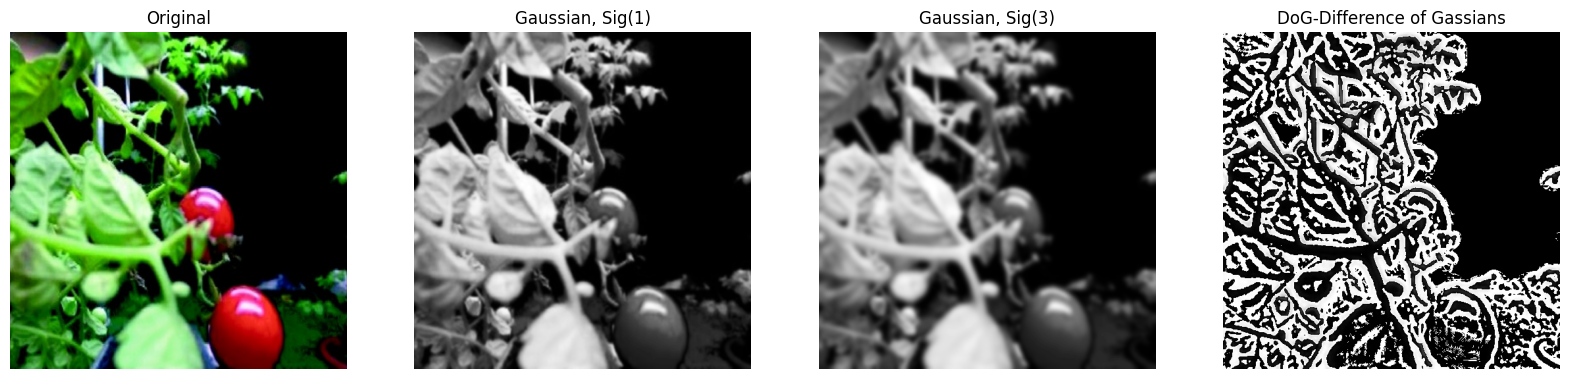

...::: Chroma Figure :::...


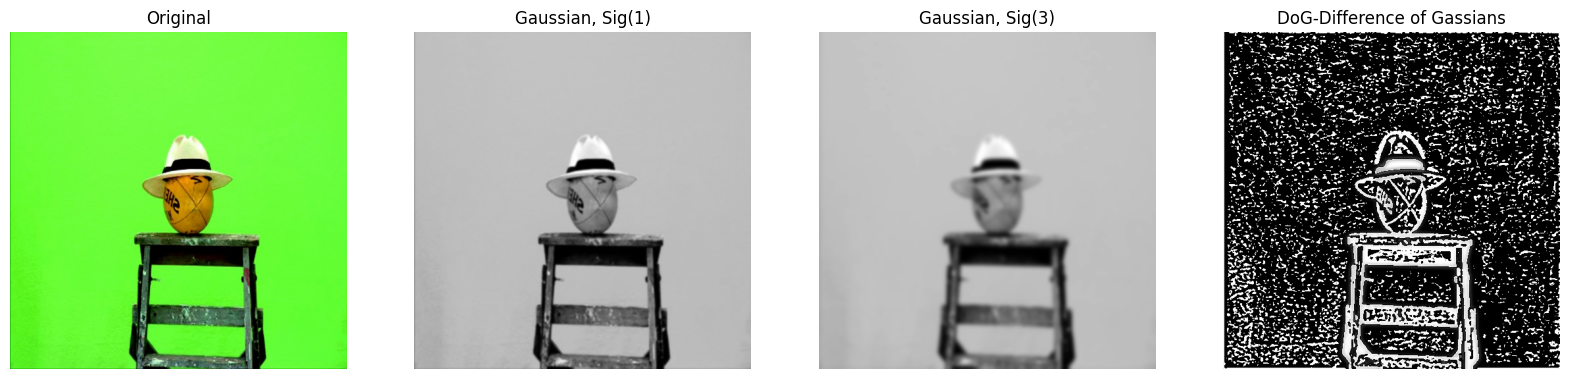

In [98]:
# Convolve the gray resized image with two gaussians (one with a scale of 1 and another with a scale of 3)
gaussian_sigma1 = 1
gaussian_sigma3 = 3

gaussian_kernel_size = (19, 19)

gaussian_sig1_tomato = cv.GaussianBlur(gray_tomato, gaussian_kernel_size , gaussian_sigma1)
gaussian_sig3_tomato = cv.GaussianBlur(gray_tomato, gaussian_kernel_size , gaussian_sigma3)


gaussian_sig1_chroma = cv.GaussianBlur(gray_chroma, gaussian_kernel_size , gaussian_sigma1)
gaussian_sig3_chroma = cv.GaussianBlur(gray_chroma, gaussian_kernel_size , gaussian_sigma3)


# find the difference of gaussians

dog_tomato = gaussian_sig1_tomato - gaussian_sig3_tomato

dog_chroma = gaussian_sig1_chroma - gaussian_sig3_chroma

# Show the origional image, the two gaussians results, and the DoG results

print("...::: Tomato Figure :::...")

tomato_images = [rgb_tomato, gaussian_sig1_tomato, gaussian_sig3_tomato, dog_tomato]
tomato_titles = ["Original", f"Gaussian, Sig({gaussian_sigma1})", f"Gaussian, Sig({gaussian_sigma3})", "DoG-Difference of Gassians"]
show_images_figure(tomato_images, tomato_titles)


print("...::: Chroma Figure :::...")

chroma_images = [rgb_chroma, gaussian_sig1_chroma, gaussian_sig3_chroma, dog_chroma]
chroma_titles = ["Original", f"Gaussian, Sig({gaussian_sigma1})", f"Gaussian, Sig({gaussian_sigma3})", "DoG-Difference of Gassians"]
show_images_figure(chroma_images, chroma_titles)


### Canny Edge Detector

Tomato Median = 53.0
Tomato Lower = 36
Tomato Upper = 69


Chroma Median = 187.0
Chroma Lower = 127
Chroma Upper = 246


...::: Tomato Figure:::...


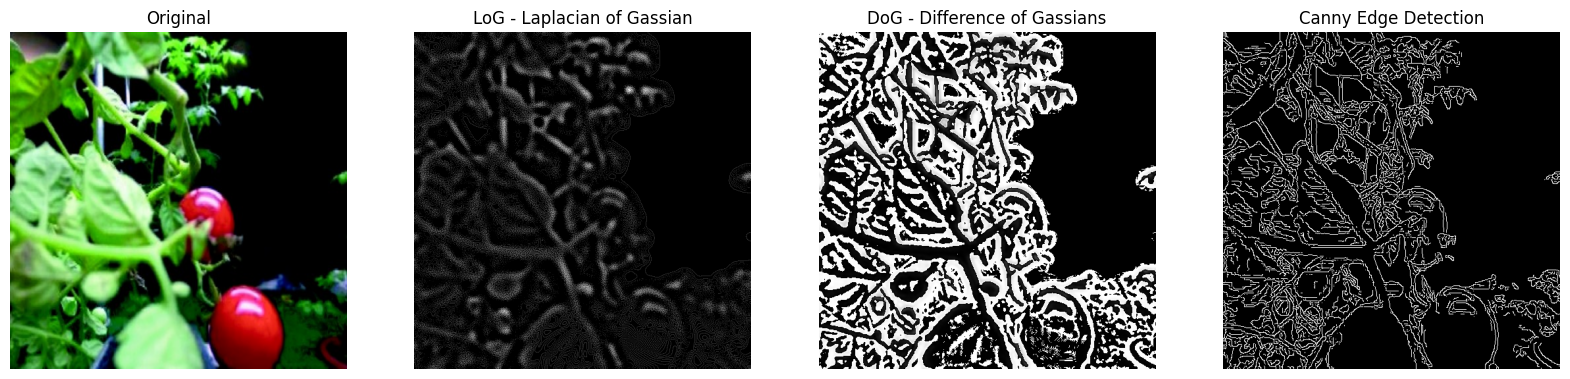

...::: Chroma Figure:::...


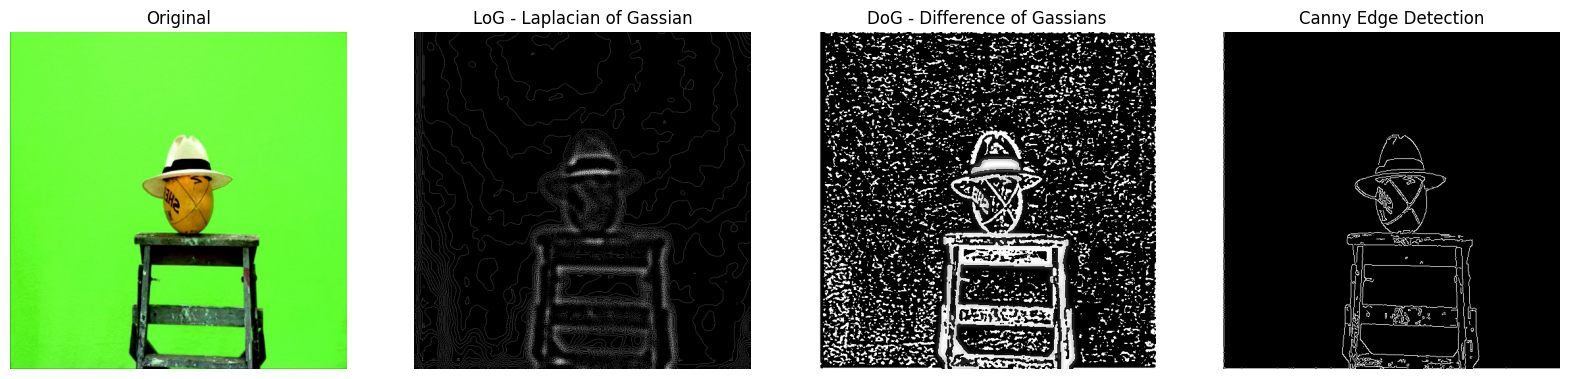

In [99]:
# Find the median then the two thresholds of the gray resized image, and print the three values

median_tomato = np.median(gray_tomato)
lower_tomato = int(median_tomato * 0.68)
upper_tomato = int(median_tomato * 1.32)

print("Tomato Median =", median_tomato)
print("Tomato Lower =", lower_tomato)
print("Tomato Upper =", upper_tomato, end="\n\n\n")


median_chroma = np.median(gray_chroma)
lower_chroma = int(median_chroma * 0.68)
upper_chroma = int(median_chroma * 1.32)

print("Chroma Median =", median_chroma)
print("Chroma Lower =", lower_chroma)
print("Chroma Upper =", upper_chroma, end="\n\n\n")

# Apply automatic Canny edge detection using the computed thresholds
canny_tomato = cv.Canny(gray_tomato, lower_tomato, upper_tomato)

canny_chroma = cv.Canny(gray_chroma, lower_chroma, upper_chroma)

# show the original image, the LoG, the DoG, and the Canny results in one figure

print("...::: Tomato Figure:::...")

tomato_images = [rgb_tomato, log_tomato, dog_tomato, canny_tomato]
tomato_titles = ["Original", "LoG - Laplacian of Gassian" , "DoG - Difference of Gassians", "Canny Edge Detection"]
show_images_figure(tomato_images, tomato_titles)


print("...::: Chroma Figure:::...")

chroma_images = [rgb_chroma, log_chroma, dog_chroma, canny_chroma]
chroma_titles = ["Original", "LoG - Laplacian of Gassian" , "DoG - Difference of Gassians", "Canny Edge Detection"]
show_images_figure(chroma_images, chroma_titles)

## Morphological Operations

### Opening or Closing

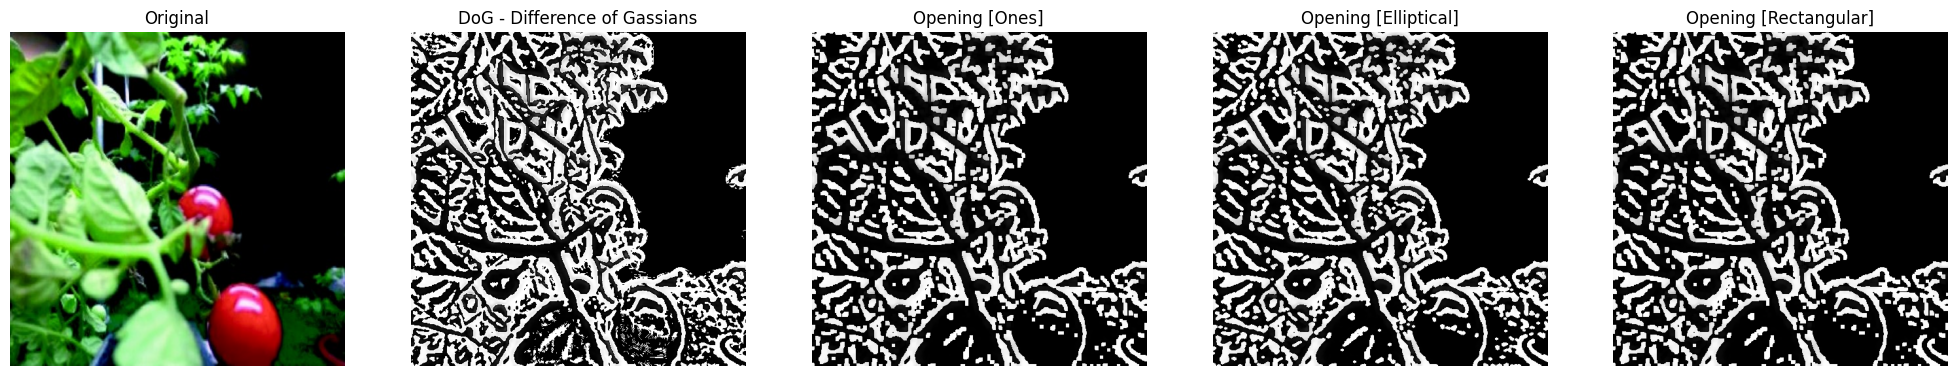

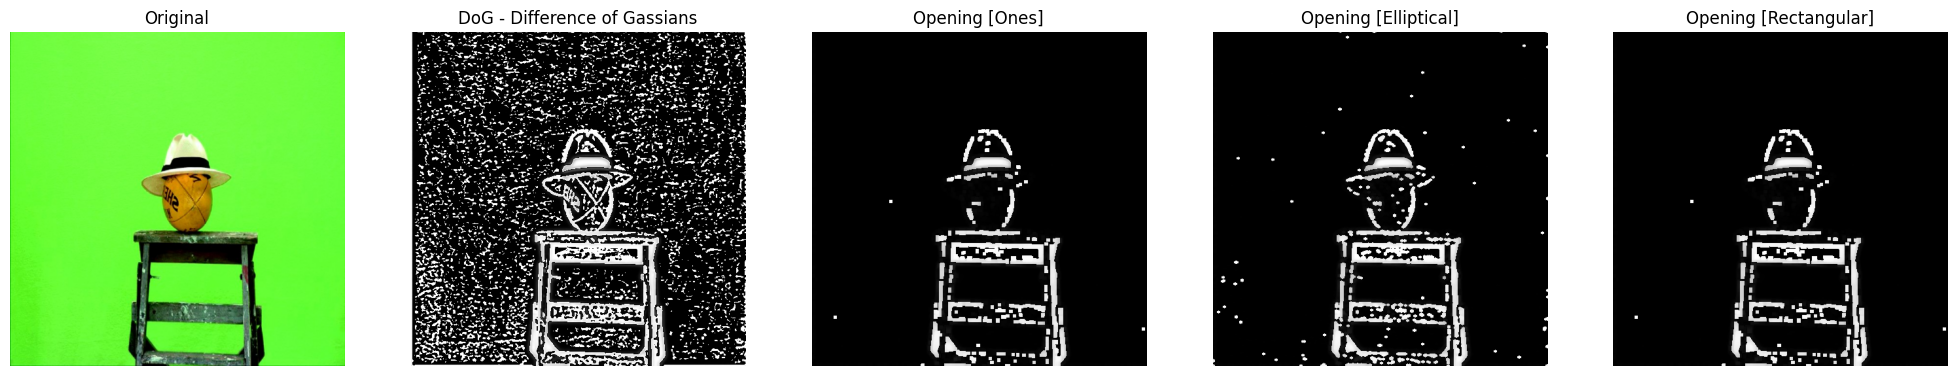

In [100]:
# enhance the DoG results using opening or closing, create a mask with suitable size and shape then use opening or closing

kernel_size = (5, 5)
ones_kernel = np.ones([5, 5]) # structural Element

# After different trials with different kernels and sizes, the opening morphology is the required process to enhance DoG.

elliptical_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, kernel_size)
rectangular_kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)

ones_opening_tomato = cv.morphologyEx(dog_tomato, cv.MORPH_OPEN, ones_kernel)
elliptical_opening_tomato = cv.morphologyEx(dog_tomato, cv.MORPH_OPEN, elliptical_kernel)
rectangular_opening_tomato = cv.morphologyEx(dog_tomato, cv.MORPH_OPEN, rectangular_kernel)


ones_opening_chroma = cv.morphologyEx(dog_chroma, cv.MORPH_OPEN, ones_kernel)
elliptical_opening_chroma = cv.morphologyEx(dog_chroma, cv.MORPH_OPEN, elliptical_kernel)
rectangular_opening_chroma = cv.morphologyEx(dog_chroma, cv.MORPH_OPEN, rectangular_kernel)


# show the origional Dog and the enhanced DoG

tomato_images = [rgb_tomato, dog_tomato, ones_opening_tomato, elliptical_opening_tomato, rectangular_opening_tomato]
tomato_titles = ["Original", "DoG - Difference of Gassians", "Opening [Ones]", "Opening [Elliptical]", "Opening [Rectangular]"]
show_images_figure(tomato_images, tomato_titles)  # Elliptical looks the best

chroma_images = [rgb_chroma, dog_chroma, ones_opening_chroma, elliptical_opening_chroma, rectangular_opening_chroma]
chroma_titles = ["Original", "DoG - Difference of Gassians", "Opening [Ones]", "Opening [Elliptical]", "Opening [Rectangular]"]
show_images_figure(chroma_images, chroma_titles)

### Histogram and Binarization

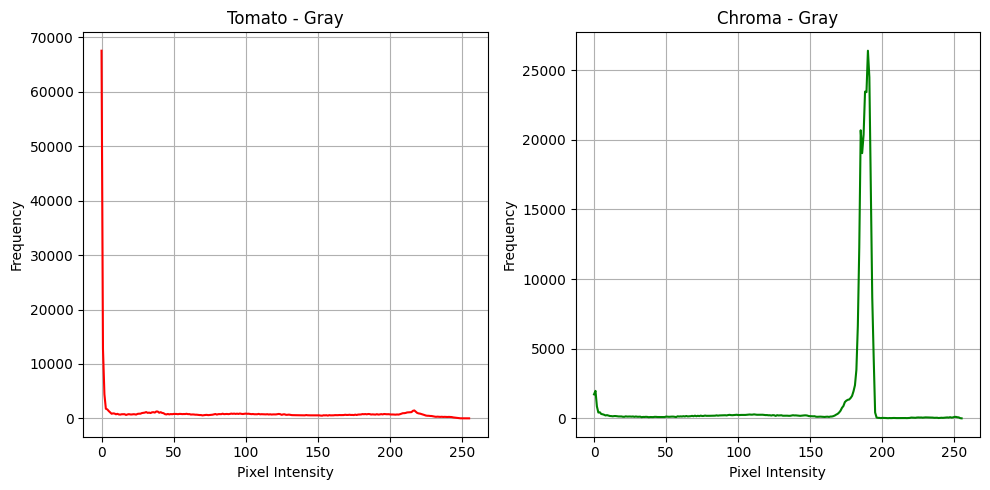

In [101]:
# Find the histogram of the gray resized image and plot it
plot_multiple_histograms([gray_tomato, gray_chroma], colors=["Red", "Green"], labels=["Tomato - Gray", "Chroma - Gray"])


...:::Tomato Histograms:::...



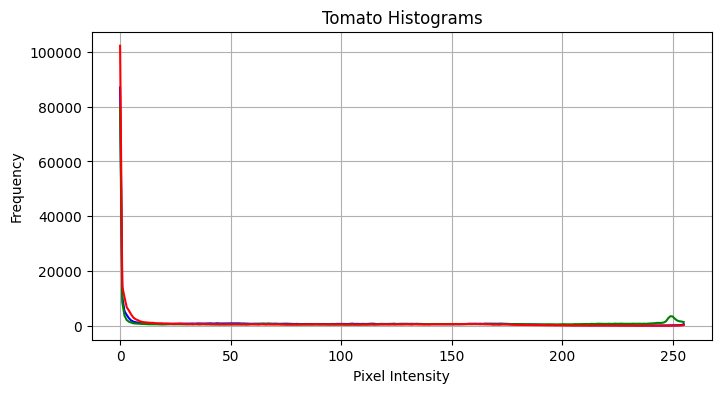


...:::Chroma Histograms:::...



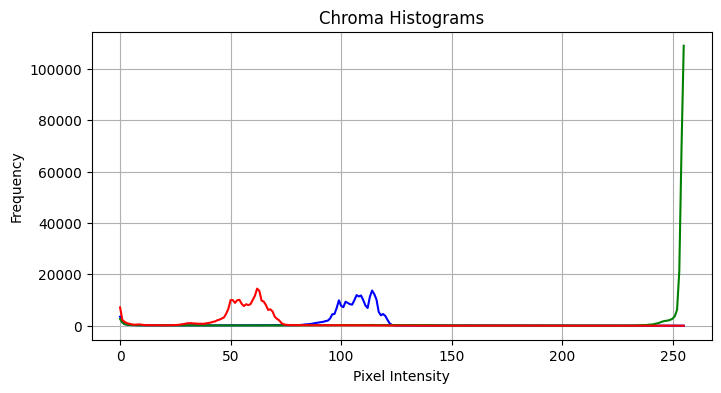

In [102]:
# Calculate the histogram for each color channel and show them in one plot
print("\n...:::Tomato Histograms:::...\n")
tomato_r, tomato_g, tomato_b = cv.split(rgb_tomato)
colors=["Blue", "Green", "Red"]

plot_one_histogram([tomato_r, tomato_g, tomato_b], colors=colors, title="Tomato Histograms")

print("\n...:::Chroma Histograms:::...\n")

chroma_r, chroma_g, chroma_b = cv.split(rgb_chroma)

plot_one_histogram([chroma_r, chroma_g, chroma_b], colors=colors, title="Chroma Histograms")


...:::Tomato Binarization:::...



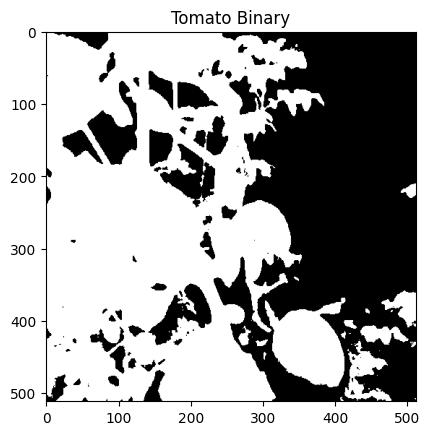


...:::Chroma Binarization:::...



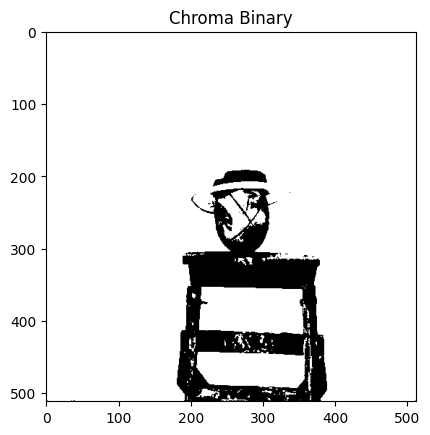

In [103]:
# Using the peak of the histogram or the median value, binarise the gray scale image and show it.

print("\n...:::Tomato Binarization:::...\n")

_, binary_tomato = cv.threshold(gray_tomato, lower_tomato, upper_tomato, cv.THRESH_BINARY)
# OR
# binary_tomato2 = np.where(gray_tomato > median_tomato, 255, 0)

show_image(binary_tomato, title="Tomato Binary")


print("\n...:::Chroma Binarization:::...\n")

_, binary_chroma = cv.threshold(gray_chroma, lower_chroma, upper_chroma, cv.THRESH_BINARY)

show_image(binary_chroma, title="Chroma Binary")

## Color Segmentation

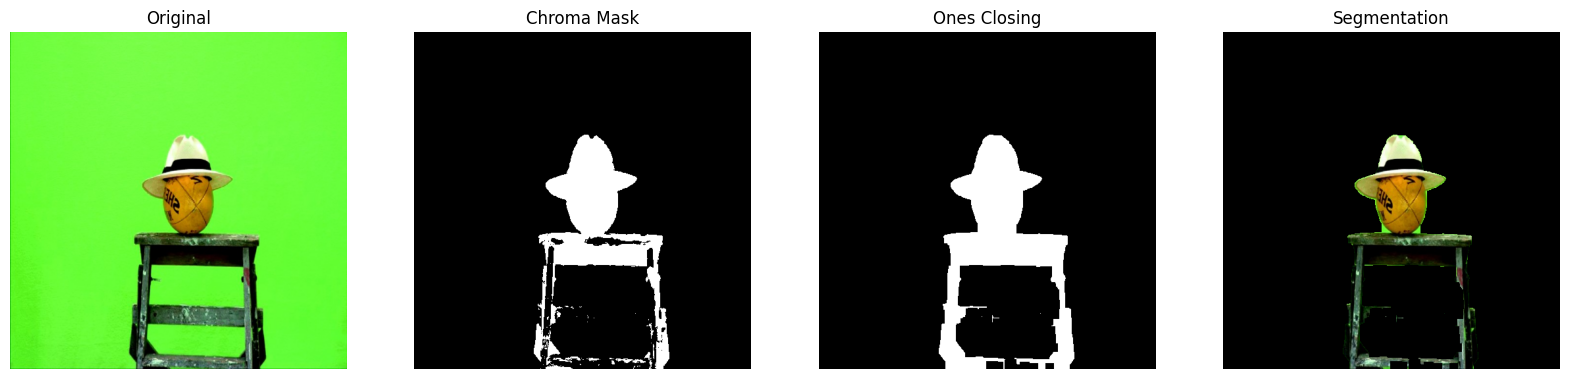

In [104]:
# Load the image attached to the assignment called "segment"

# (((((Already loaded before)))))

# Convert to suitable color space

hsv_chroma = cv.cvtColor(rgb_chroma, cv.COLOR_RGB2HSV)


# Define the color range for segmentation, we want to extract the object. Hint: you can extract the green then inverse the mask
lower_green = np.array([50, 50, 50])
upper_green = np.array([110, 255, 255])


# Create a mask with the specified color range
mask = cv.inRange(hsv_chroma, lower_green, upper_green)

# To extract everything except the green color, I will inverse the green mask
chroma_mask = cv.bitwise_not(mask)


# enhance the mask using morphological operations
ones_kernel = np.ones([13, 13]) # structural Element
ones_closing_chroma = cv.morphologyEx(chroma_mask, cv.MORPH_CLOSE, ones_kernel)


# apply the mask on the original RGB image
filtered_image = cv.bitwise_and(rgb_chroma, rgb_chroma, mask=ones_closing_chroma)


# Display the original and segmented images
show_images_figure([rgb_chroma, chroma_mask, ones_closing_chroma, filtered_image], ["Original", "Chroma Mask", "Ones Closing", "Segmentation"])

## Feature extraction

### Harris

In [105]:
# Load the image attached to the assignment called "extract"
# (((((Already loaded before)))))


# convert it to suitable color space and value type for Harries function


# Apply Harris function, and print its execution time


# filter the number of corners and show them in red on the origional RGB image

### SIFT

In [106]:
# convert it to suitable color space and value type for SIFT function

# Apply SIFT function, and print its execution time and number of keypoints


# show the keypoints on the origional RGB image

### Fast

In [107]:
# convert it to suitable color space and value type for Fast function

# Apply Fast function, and print its execution time and number of keypoints


# show the keypoints on the origional RGB image

## What real life problems can you solve using the methods applied in this assignment?

Your Answer Here:

- Counting Objects
- Object Identification based on calculated area.
- Extracting the object from the environment (such as working with robotic arm)
